# 16-bit adder using QuantumFourierTransform

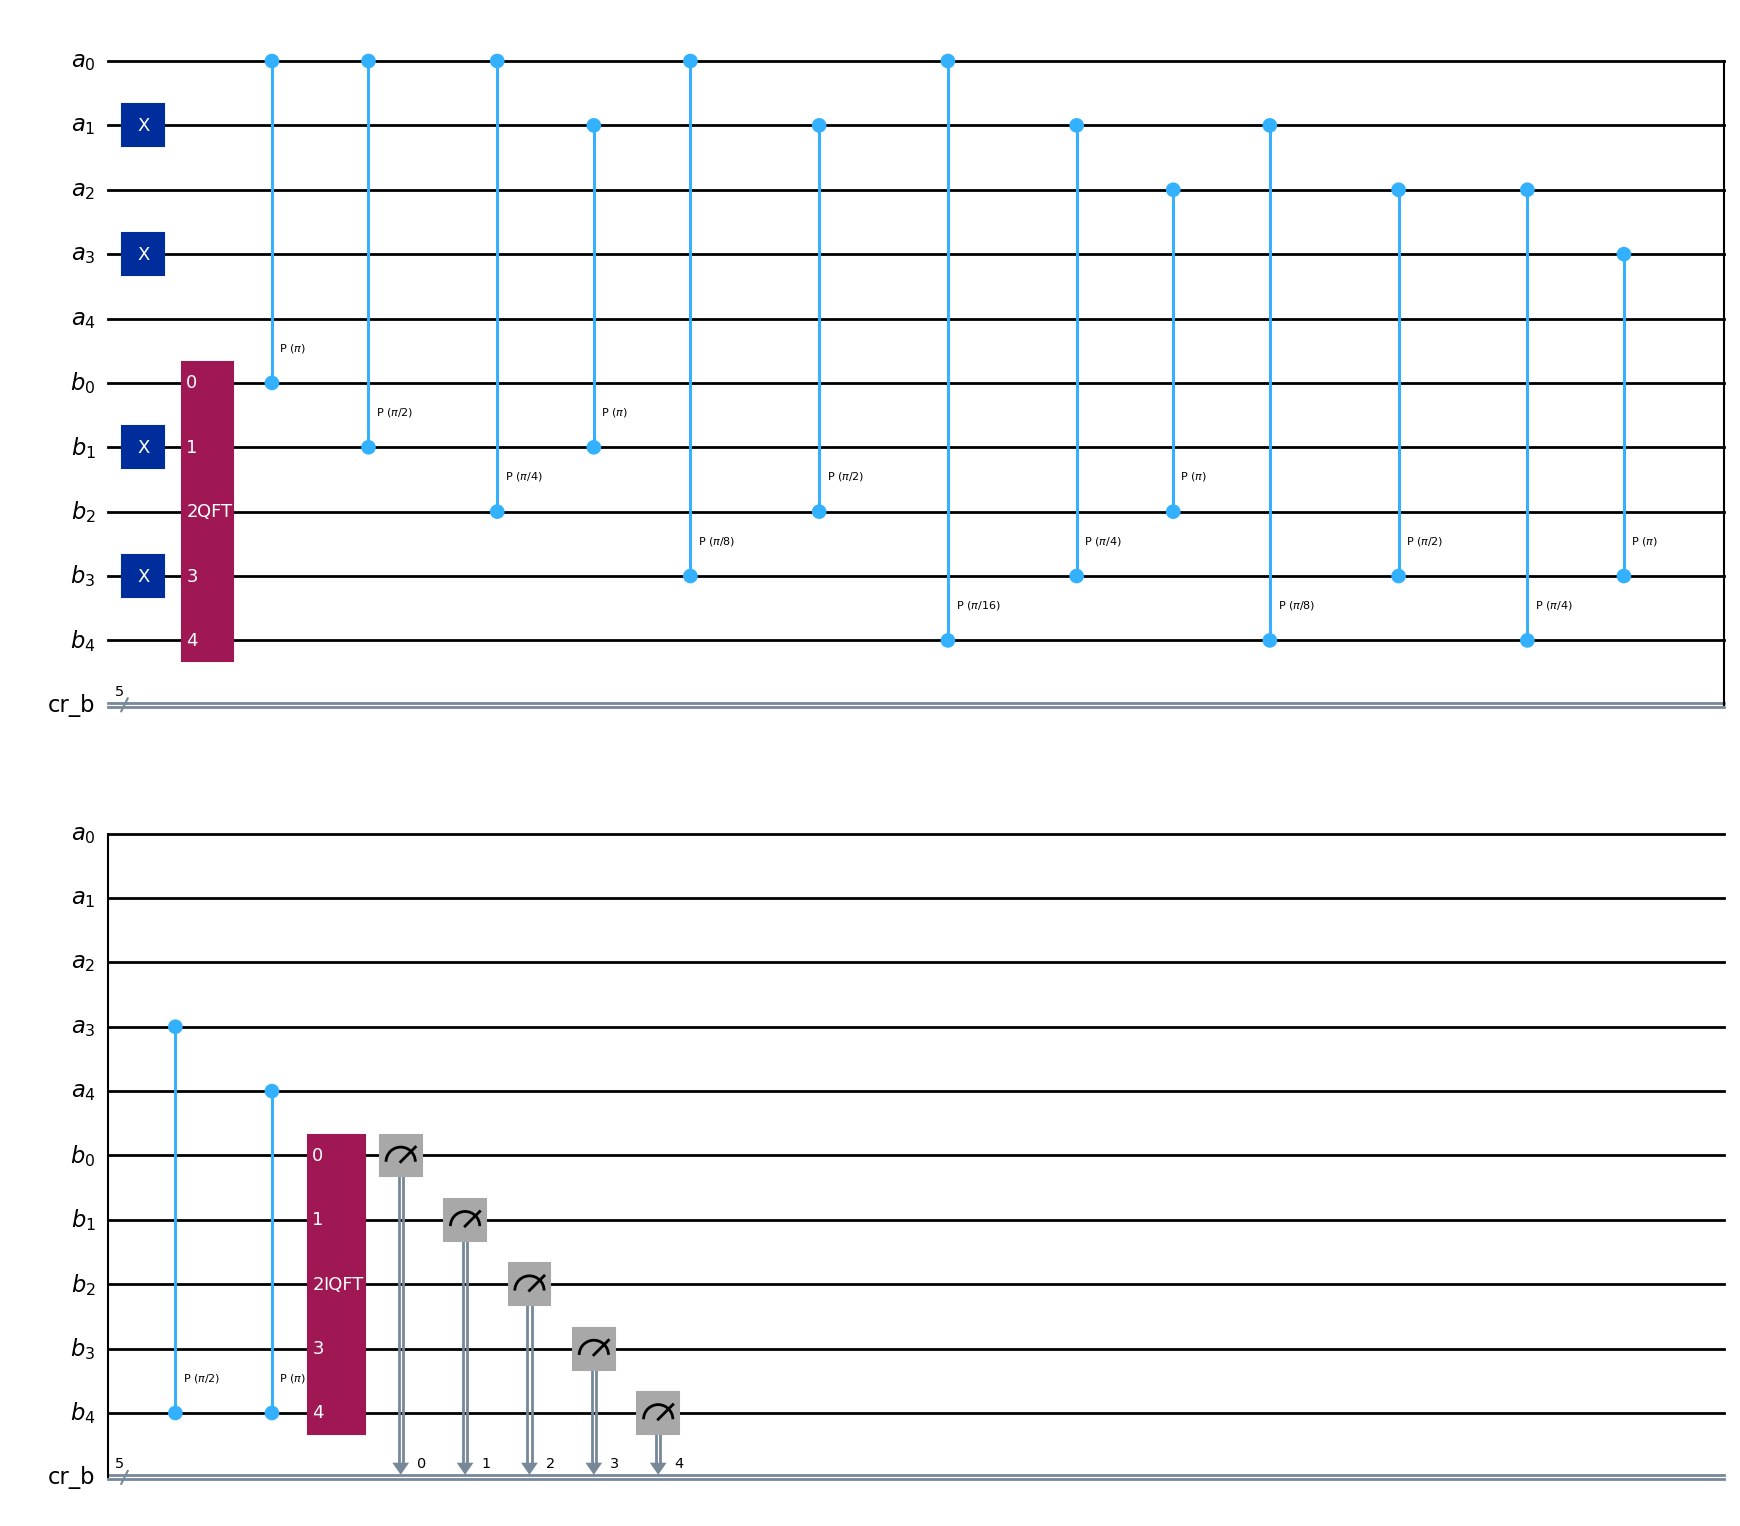

In [3]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.circuit.library import QFT
import numpy as np
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from matplotlib import pyplot as plt

# Define integers
integer_a = int(input("Insert the first integer: "))
integer_b = int(input("Insert the second integer: "))

# Calculate qubit requirements
num_qubits = max(integer_a, integer_b).bit_length() + 1

# Define quantum registers and classical register for measuring qr_b
qr_a = QuantumRegister(num_qubits, "a")
qr_b = QuantumRegister(num_qubits, "b")
cr_b = ClassicalRegister(num_qubits, "cr_b")
qc = QuantumCircuit(qr_a, qr_b, cr_b)

# Initialize qubits based on binary representation of integer_a
binary_a = f'{integer_a:0{num_qubits}b}'
for i, bit in enumerate(reversed(binary_a)):
    if bit == '1':
        qc.x(qr_a[i])
binary_b = f'{integer_b:0{num_qubits}b}'
for i, bit in enumerate(reversed(binary_b)):
    if bit == '1':
        qc.x(qr_b[i])

# Apply QFT to the 'b' register
qc.append(QFT(num_qubits, do_swaps=False), qr_b)

# Apply controlled-phase gates based on integer_a to qr_b
for j in range(num_qubits):
    for k in range(num_qubits - j):
        angle = np.pi / (2**k)
        qc.cp(angle, qr_a[j], qr_b[j + k])

# Apply the inverse QFT to the 'b' register
qc.append(QFT(num_qubits, do_swaps=False).inverse(), qr_b)

# Measure only the qubits in 'b' register into cr_b
qc.measure(qr_b, cr_b)

qc.draw(output='mpl')

# Run simulation and print the results

In [4]:
# Execute the circuit on a simulator
simulator = AerSimulator()
circ = transpile(qc, simulator)
result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts)
plt.show()

# Extract the most common measurement outcome
measured_binary = max(counts, key=counts.get)  # Get the most likely result
decimal_result = int(measured_binary, 2)

print("Binary Result:", measured_binary)
print("Decimal Result:", decimal_result)

Binary Result: 10100
Decimal Result: 20
